## INTRODUÇÃO

A crescente utilização de técnicas de Aprendizado de Máquina na área da saúde tem possibilitado o desenvolvimento de modelos capazes de auxiliar na detecção precoce de doenças, contribuindo para a tomada de decisão clínica. Entre essas aplicações, o diagnóstico de diabetes destaca-se como um problema relevante, uma vez que a identificação antecipada da doença pode reduzir complicações e melhorar a qualidade de vida dos pacientes.

Neste trabalho, foram avaliados diferentes modelos de classificação com o objetivo de prever a ocorrência de diabetes a partir de dados clínicos. Ao longo do estudo, etapas como análise exploratória dos dados, pré-processamento, treinamento e avaliação de modelos foram conduzidas, considerando métricas de desempenho adequadas ao contexto médico, com ênfase na redução de falsos negativos.

Além da avaliação do desempenho preditivo, buscou-se compreender o comportamento dos modelos por meio de técnicas de interpretação, uma vez que a transparência e a explicabilidade são aspectos fundamentais para aplicações em saúde. Dessa forma, foram utilizadas abordagens como Feature Importance e SHAP, aplicadas a um modelo auxiliar, com o intuito de identificar os principais fatores associados às decisões do classificador.

Ao final, os resultados obtidos foram discutidos de forma crítica, considerando tanto o desempenho dos modelos quanto suas limitações e implicações práticas. Espera-se que este estudo contribua para a compreensão do uso de técnicas de Aprendizado de Máquina no apoio ao diagnóstico de diabetes, destacando a importância do equilíbrio entre desempenho, robustez e interpretabilidade.

## DADOS

O conjunto de dados utilizado neste estudo é o Pima Indians Diabetes Dataset, amplamente empregado em pesquisas de Aprendizado de Máquina na área da saúde. A base é composta por 768 registros de pacientes do sexo feminino, com idade mínima de 21 anos, e tem como objetivo a predição da ocorrência de diabetes.

O dataset contém 8 variáveis preditoras relacionadas a características clínicas e laboratoriais, além de uma variável alvo binária que indica a presença ou ausência da doença. A base apresenta desafios comuns a dados médicos, como valores ausentes representados por zeros em algumas variáveis, o que demandou etapas de pré-processamento antes do treinamento dos modelos.

Apesar de sua ampla utilização, trata-se de um conjunto de dados específico, o que pode limitar a generalização dos resultados para outros contextos clínicos.


| Feature                  | Descrição                        |
| ------------------------ | -------------------------------- |
| Pregnancies              | Número de gestações                |
| Glucose                  | Glicose: Concentração de glicose plasmática após 2 horas em um teste oral de tolerância à glicose         |
| BloodPressure            | Pressão Arterial: Pressão arterial diastólica (mm Hg)                |
| SkinThickness            | Espessura da Pele: Espessura da prega cutânea do tríceps (mm)      |
| Insulin                  | Insulina: Insulina sérica após 2 horas (µU/ml)                         |
| BMI                      | IMC: Índice de massa corporal (peso em kg/(altura em m)^2)       |
| DiabetesPedigreeFunction | Função da Linhagem Diabética: Função da linhagem diabética             |
| Age                      | Idade                            |
| Outcome                  | 0 = não diabético, 1 = diabético |

🎯 *Outcome* é a feature alvo. Ela indica se o indivídui tem (1) ou não (0) diabetes.


## EXPLORAÇÃO DE DADOS

In [ ]:
# importacao das bibliotecas para tratamento dos dados
! pip install pandas matplotlib seaborn numpy scikit-learn shap


import pandas as pd # Para trabalhar com dados tabulares
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import sklearn as sk #modelagem preditiva

In [75]:
# opening the dataset
data = pd.read_csv('diabetes.csv')

# visualizando as 5 primeiras linhas do dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
# verificando a quantidade de linhas e colunas
data.shape

(768, 9)

A base de dados possui 768 registros, 8 variáveis e mais a feature alvo.

Verificando se os dados estão balanceados, ou seja, se temos uma distribuição homogênea de registros positivos e negativos para Diabetes (Outcome 1 e 0, respectivamente)

Total de dados:  768
Total de não diabéticos:  500
Total de diabéticos:  268
Percentual de diabéticos na base:  35.0 %


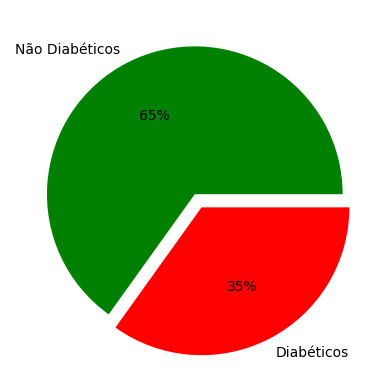

In [77]:
Total = len(data)
TotalNaoDiabetes = data['Outcome'].value_counts()[0] 
TotalDiabetes = data['Outcome'].value_counts()[1] 

Percentual_Diabetes = data['Outcome'].value_counts(normalize=True)[1]

print("Total de dados: ", Total)
print("Total de não diabéticos: ", TotalNaoDiabetes)
print("Total de diabéticos: ", TotalDiabetes)
print("Percentual de diabéticos na base: ", (round(Percentual_Diabetes, 2)*100), "%")

categororias = ["Não Diabéticos", "Diabéticos"]
plt.pie(data["Outcome"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()


Agora vamos verificar o tipo de dado de cada coluna e a quantidade de valores nulos


In [78]:
# verificando o tipo de dado de cada coluna e a quantidade de valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [79]:
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Não há valores nulos nas variaáveis.

Com relação as estatísticas descritivas da base:

In [80]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Mesmo não havendo registros nulos percebe-se que existem valores zerados em variáveis que não fazem sentido (os marcadores fisiológicos). Podemos concluir que esses valores não foram fornecidos no momento da coleta das informações.


Vendo com mais detalhes a quantidade de registros que apresentam esse comportamento:

In [81]:
(data == 0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Todos as variáveis fisiológicas apresentam valores não fornecidos, com atenção especial para a SkinThickness e a Insulin.

Vamos verificar se as variáveis com mais zeros nessas duas variáveis estão concentradas em algum dos alvos:


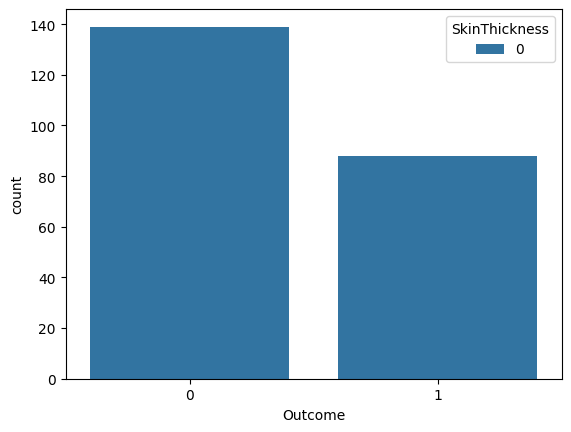

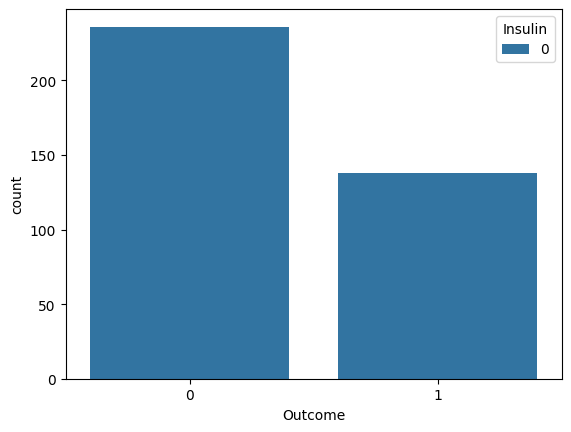

In [82]:
# verificando a distribuição das variaveis fisiológicas zeradas entre os grupos de diabéticos e não diabéticos
variaveis = ["SkinThickness", "Insulin"]
for variavel in variaveis:
    sns.countplot(x='Outcome', hue=variavel, data=data[data[variavel] == 0])
    plt.show()

Caso desconsideremos as variaveis com valores 0 em SkinThickness e Insulin alteramos o balanceamento da base de dados?

Total de dados:  394
Total de não diabéticos:  264
Total de diabéticos:  130
Percentual de diabéticos na base:  33.0 %


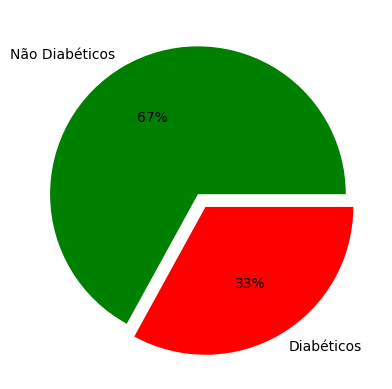

In [83]:
# considerando apenas os valores diferente de 0:
novos_dados = data[(data['SkinThickness'] != 0) & (data['Insulin'] != 0)]
Total = len(novos_dados)
TotalNaoDiabetes = novos_dados['Outcome'].value_counts()[0] 
TotalDiabetes = novos_dados['Outcome'].value_counts()[1] 

Percentual_Diabetes = novos_dados['Outcome'].value_counts(normalize=True)[1]

print("Total de dados: ", Total)
print("Total de não diabéticos: ", TotalNaoDiabetes)
print("Total de diabéticos: ", TotalDiabetes)
print("Percentual de diabéticos na base: ", (round(Percentual_Diabetes, 2)*100), "%")

categororias = ["Não Diabéticos", "Diabéticos"]
plt.pie(novos_dados["Outcome"].value_counts(), labels = categororias, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

O balanceamento dos dados não foi alterado significativamente desconsiderando as variáveis com valores não informados.

Analisando a representatividade de cada variável:

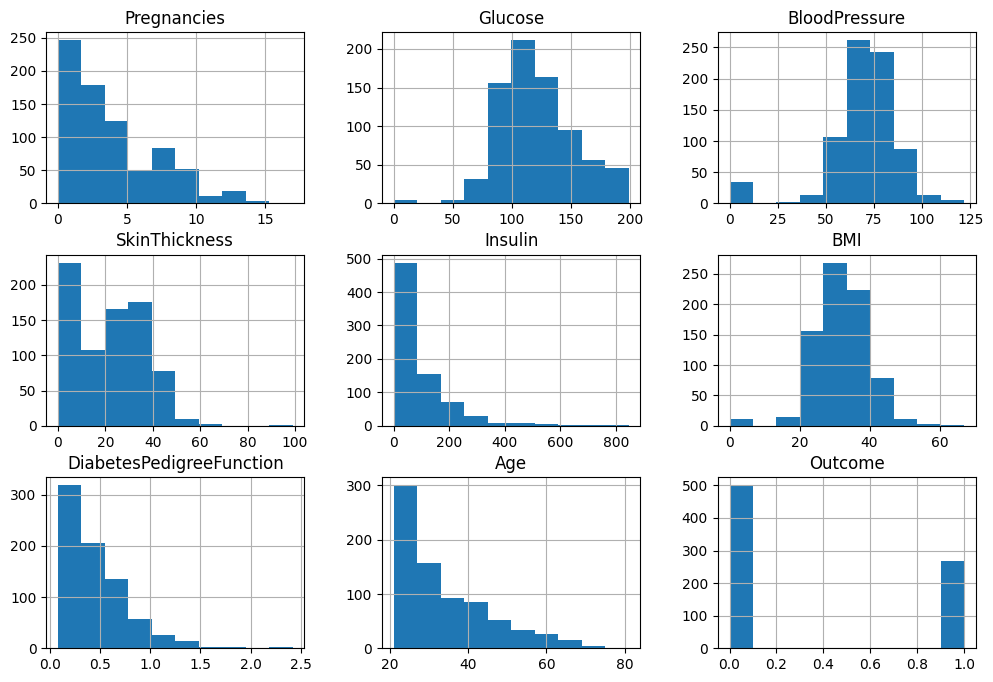

In [84]:
data.hist(figsize=(12, 8))
plt.show()

Foi possível verificar que não temos uma boa representatividade de casos com idades a partir dos 40 anos.

Para entender melhor se existe alguma relação dos casos onde não foram informados os valores para SkinThickness e Insulin com a demais variáveis, vamos analisar a distribuição delas nesses dois cenários:

Distribuição das variáveis para registros com SkinThickness = 0


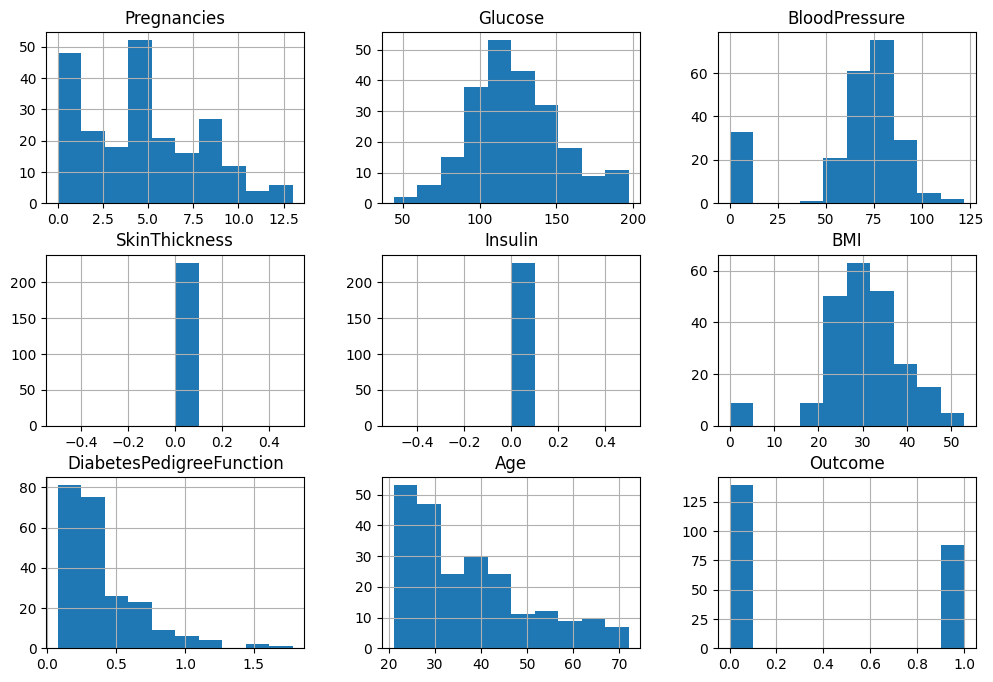

Distribuição das variáveis para registros com Insulin = 0


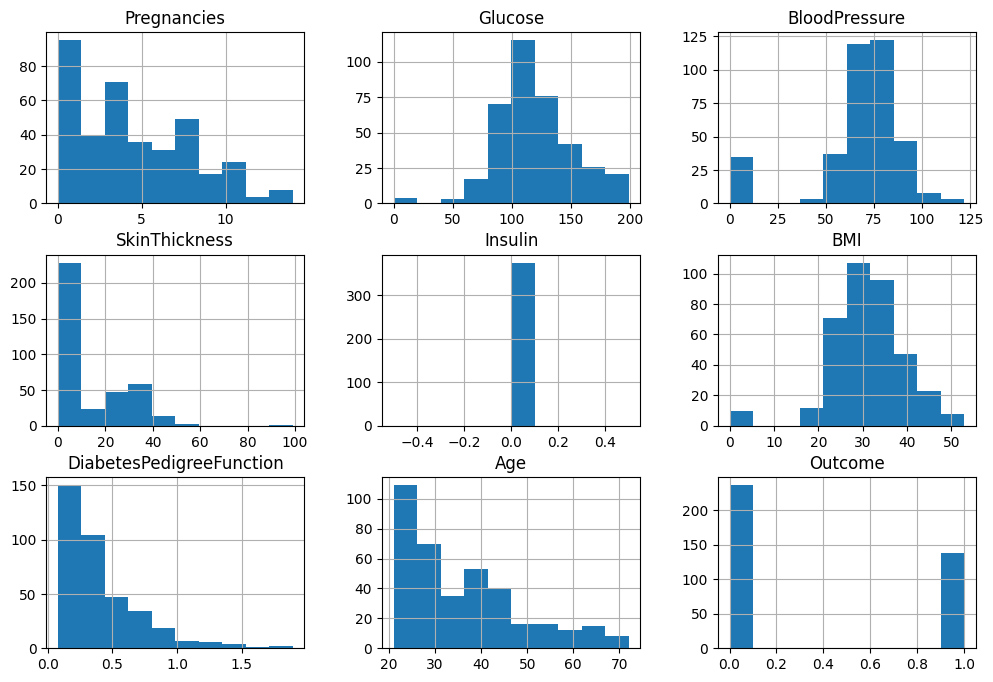

In [85]:
# visualizando a distribuição das demais variáveis para os registros cujas variaveis SkinThickness e Insulin são iguais a zero
import seaborn as sns
import matplotlib.pyplot as plt

variaveis = ["SkinThickness", "Insulin"]
for variavel in variaveis:
    print("Distribuição das variáveis para registros com", variavel, "= 0")
    data[data[variavel] == 0].hist(figsize=(12, 8))
    plt.show()

Com os gráficos acima foi possível observar que os registros que não informaram o valor da SkinThickness também não informaram o valor para Insulin. Mas existem mais registros sem o valor de Insulin, que informaram o valor da SkinThickness.


Observamos também que não houve grande alteração na representatividade das demais variáveis se comparando com os gráficos com e sem os valores zerados para SkinThickness e Insulin.

Analisamos abaixo como cada variável impacta o alvo:

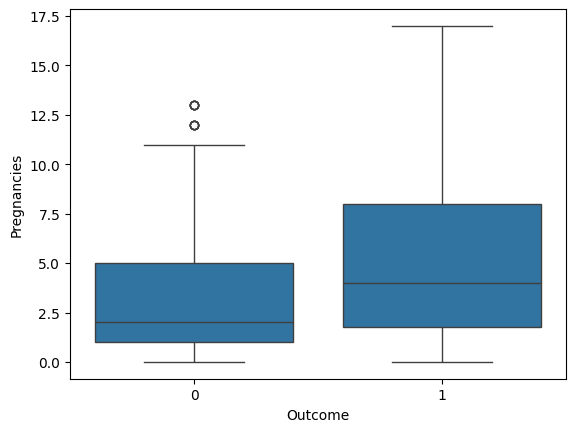

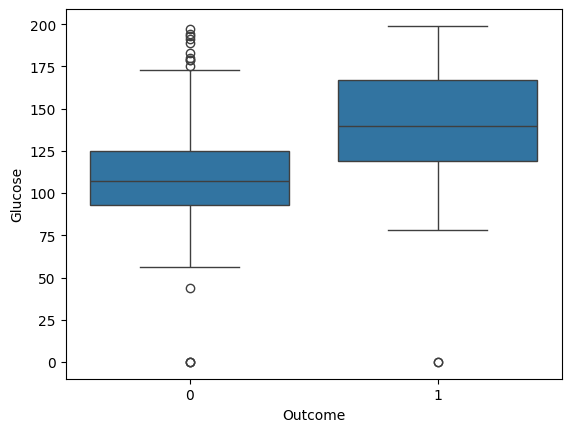

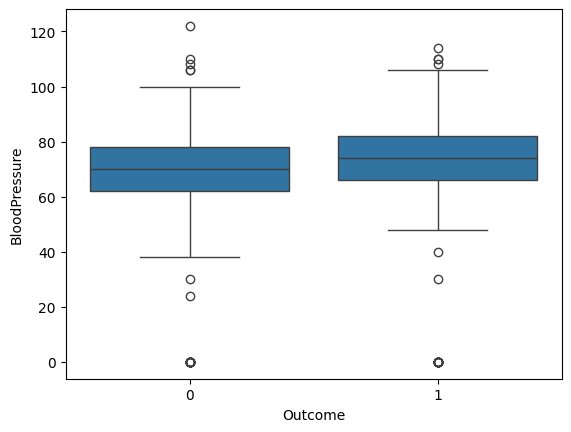

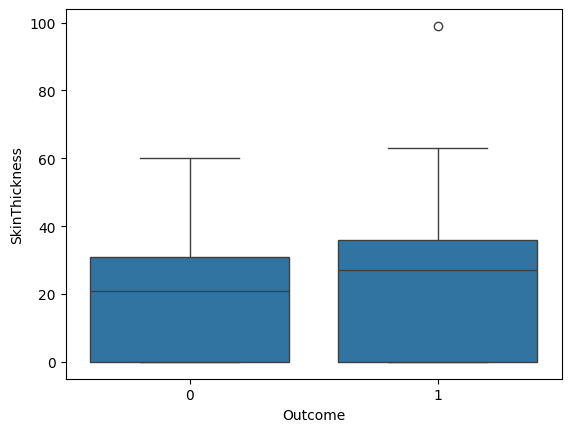

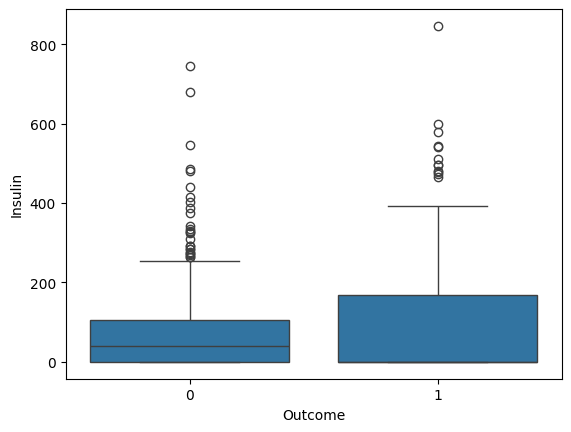

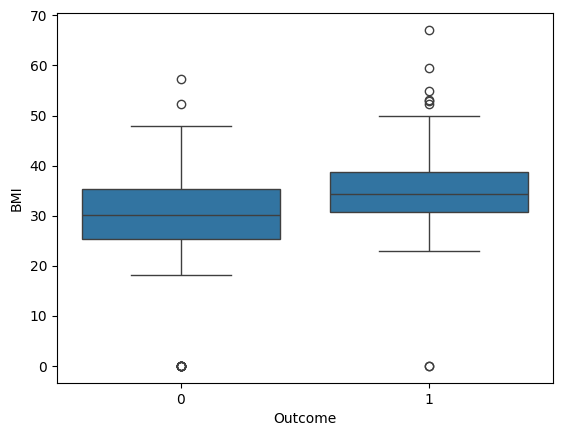

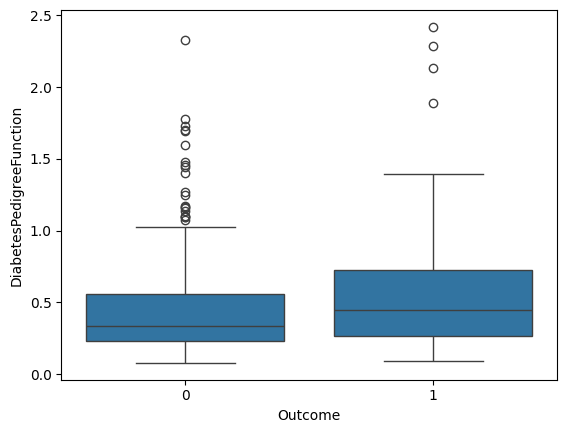

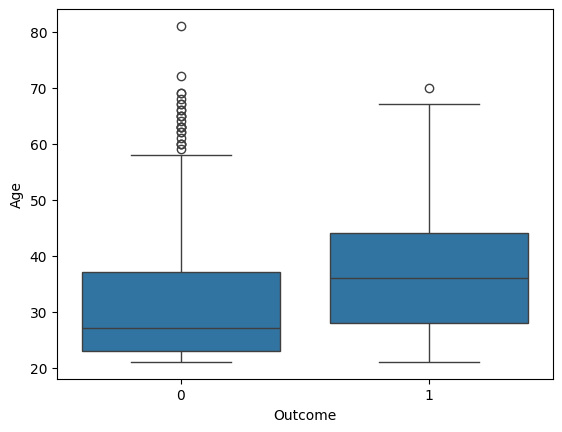

In [86]:
variaveis = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for variavel in variaveis:
    sns.boxplot(x='Outcome', y=variavel, data=data)
    plt.show()

Podemos verificar que a variável que mais impacta na classificação de diabéticos e não diabéticos é a variável Glucose, seguida pela variável BMI.


Agora, correlacionando as variáveis entre si, temos:

<Axes: >

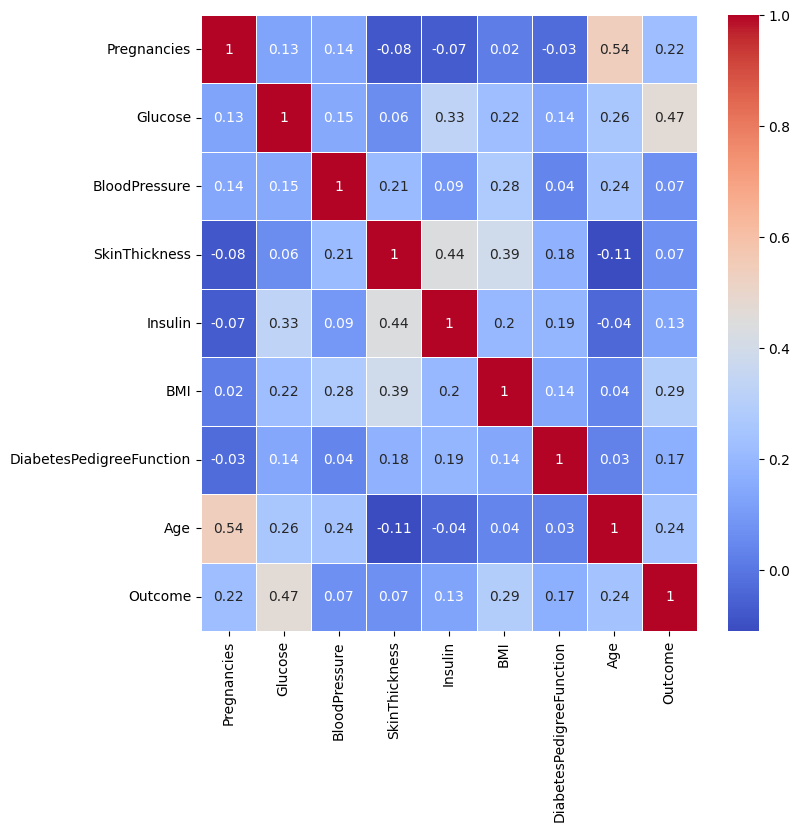

In [87]:
correlation_matrix = data.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap='coolwarm')


A análise do gráfico de correlação revela que não há correlações fortes entre as variáveis, predominando relações fracas e algumas moderadas. Isso indica que os atributos não apresentam dependência linear significativa entre si, o que reduz a ocorrência de multicolinearidade.

### O que vimos na nossa análise exploratória?

- Nossa base possui 768 registros com 9 colunas.
- A base não é totalmente balanceada, apresentando 65% para Diabete Positivo e 35% para Diabete Negativo.
- Não temos registros nulos, mas existem registros com variáveis cujos valores não foram fornecidos (estão zerados), com atenção especial para as variáveis SkinThickness e Insulin.
- Caso esses registros fossem desconsiderados, não haveria grandes mudanças no balanceamento original da base e nem na distribuição das demais variáveis.
- A correlação das variáveis é de fraca à moderada.
- Embora uma das variáveis (Glucose) possui mais representatividade nos registros positivos para Diabetes, ela sozinha não é a responsável por definir o diagnóstico.

## PRÉ-PROCESSAMENTO DE DADOS

### Separando as variáveis do alvo
Separar as variáveis independentes (features) da dependente (target / alvo = Outcome)

In [88]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

### Tratando os valores não informados
Precisamos substituir os 0s dos valores não informados das variaveis fisiológicas para NaN para que elas não sejam interpretadas de maneira incorreta já que 0 é um valor válido e pode distorcer os dados estatísticos gerados no modelo.

In [89]:
import numpy as np

variaveis_zeradas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
X[variaveis_zeradas] = X[variaveis_zeradas].replace(0, np.nan)

### Tratanto os valores nulos -> Imputação
Para não descartamos os registros que possuem valores nulos (antigos 0s), vamos tratá-los por meio de imputação utilizando a *mediana* dos demais valores presentes na base. Ao usar a mediana, evitamos desvios gerados pelos outliers.

In [90]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

### Tratando a diferença de escala - Z-Score Padronização
Para tratar as diferenças de escala das variáveis, vamos padronizar os dados utilizando o StandardScaler (Z-Score), uma vez que o conjunto apresenta variáveis em diferentes escalas e presença de valores extremos. Se utilizássemos o escalonamento min-max, os valores extremos iriam achatar todos os outros, prejudicando o treinamento do modelo.

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### Separando dados de treino e teste
Vamos separar nossa base em treino e teste definindo 20% dos registros para testes e garantindo a proporção das classes (stratify=y).

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

In [93]:
X_train.shape

(614, 8)

In [94]:
X_test.shape                                                                                 

(154, 8)

* Para garantir que vamos imputar e escalonar os dados APENAS na base de treino, vamos executar o escalonamentoe a imputação através de um pipeline de pré-processamento. Isso é importante para que nosso modelo não seja treinado acidentalmente com os dados de teste comprometendo toda a qualidade final do modelo ao ser usado em produção com novos dados.

## MODELAGEM

Nessa etapa, vamos treinar diferentes modelos de classificação para:
- prever diabetes (sim/não)
- comparar desempenho
- analisar trade-offs (precision × recall)

Dado as características da do nosso projeto, vamos testar cinco modelos de classificação e comparar os resultados:

- Regressão Logística
- Random Forest
- KNN
- SVM (SVC e LinearSVC)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

### REGRESSÃO LOGÍSTICA

A regressão logística foi utilizada como modelo baseline, por ser um modelo mais simples, por manter a interpretabilidade dos dados e por ser muito utilizado em classificações binárias na área da saúde.

In [96]:
# criando o pipeline do modelo de Regressão Logística
log_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('model', LogisticRegression(max_iter=1000))
])

# treinando o modelo de Regressão Logística
log_pipeline.fit(X_train, y_train)
# fazendo previsões no conjunto de teste
y_pred_log = log_pipeline.predict(X_test)
# criando o relatorio de desempenho do modelo de Regressão Logística
report_log = classification_report(
    y_test,
    y_pred_log,
    output_dict=True
)

### RANDOM FOREST

O modelo Random Forest foi empregado com o objetivo de capturar relações não lineares entre as variáveis, por ser pouco sensível a outliers e por reduzir o risco de overfitting por meio da combinação de múltiplas árvores de decisão.
Esse modelo não exige escalonamento.

In [97]:
from sklearn.ensemble import RandomForestClassifier

# criando o pipeline do modelo Random Forest
rf_pipeline = Pipeline([
    ('imputer', imputer),
    ('model', RandomForestClassifier(
        n_estimators=200, # número de árvores na floresta
        random_state=13 # significa reprodutibilidade, ou seja, sempre que rodar o código com esse valor, terá o mesmo resultado
    ))
])

# treinando o modelo Random Forest
rf_pipeline.fit(X_train, y_train)
# fazendo previsões com o modelo Random Forest
y_pred_rf = rf_pipeline.predict(X_test)
# criando o relatorio de desempenho do modelo Random Forest
report_rf = classification_report(
    y_test,
    y_pred_rf,
    output_dict=True
)

### KNN:

O KNN foi um dos escolhidos por funcionar bem com bases pequenas, por utilizar variáveis numéricas e padronizadas.

* Ele é sensível a ruído e outliers, mas vamos usá-lo na comparação dos resultados

Para não escolhermos um valor para K aleatoriamente, antes de treinar o modelo vamos fazer alguns testes para encontrar o K que apresenta a menor ocorrência de erro.

Text(0, 0.5, 'Mean Error')

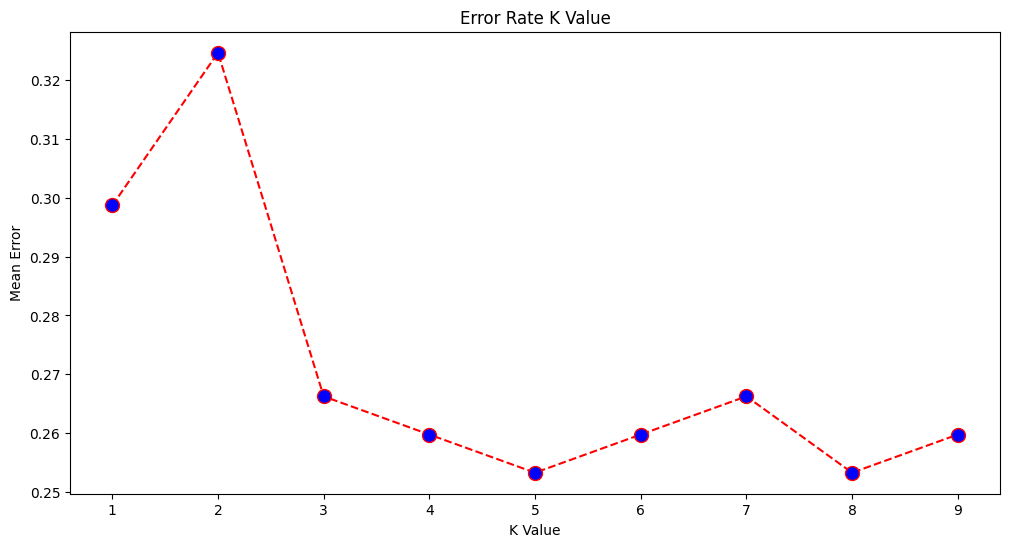

In [98]:
from sklearn.neighbors import KNeighborsClassifier

error = []

# Calculando o erro para valores de K entre 1 e 10
for i in range(1, 10): #range de tentativas para k
    knn_pipeline = Pipeline([
        ('imputer', imputer),
        ('scaler', scaler),
        ('model', KNeighborsClassifier(n_neighbors=i))
    ])
    knn_pipeline.fit(X_train, y_train)
    pred_i = knn_pipeline.predict(X_test) #armazenando as previsões
    error.append(np.mean(pred_i != y_test)) #armazenando o valor do erro médio na lista de erros

# plotando o gráfico de erro médio x valor de K
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

A partir da análise do gráfico acima, identificamos dois valores para K que minimizam os erros, 5 e 8.
Vamos considerar o 5 para o nosso treinamento.

In [99]:
# criando o pipeline do modelo KNN com o melhor valor de K encontrado
knn_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# treinando o modelo KNN
knn_pipeline.fit(X_train, y_train)
# fazendo previsões com o modelo KNN
y_pred_knn = knn_pipeline.predict(X_test)
# criando o relatorio de desempenho do modelo KNN
report_knn = classification_report(
    y_test,
    y_pred_knn,
    output_dict=True
)

### SVM

O SVM foi escolhido para enriquecer nossas opções de testes pois possui uma boa capacidade de lidar com conjuntos de dados de pequena dimensão e capturar relações não lineares por meio do uso de kernels. O modelo busca maximizar a margem entre as classes, contribuindo para uma melhor generalização.

Vamos testar tanto o classificador SVC com kernel RBF como o LinearSVC, embora sabemos que o SVC possui uma melhor capacidade de capturar relações não lineares entre as variáveis, o que é relevante para o conjunto de dados em estudo. Mesmo que LinearSVC apresente maior eficiência computacional e interpretabilidade, sua restrição a fronteiras lineares pode limitar o desempenho preditivo em problemas mais complexos.


In [100]:
from sklearn.svm import SVC

# criando o pipeline do modelo SVM
svc_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('model', SVC(
        kernel='rbf', # tipo de kernel (kernel = função usada para transformar os dados em um espaço de maior dimensão, permitindo que o SVM encontre uma fronteira de decisão não linear) 
                      # rbf (radial basis function) => função que depende da distância entre os pontos
        C=1.0, # parâmetro de regularização que controla o trade-off entre maximizar a margem e minimizar o erro de classificação
        gamma='scale', # parâmetro que define o alcance da influência de um único exemplo de treinamento. Scale é o valor padrão e é geralmente uma boa escolha
        probability=True, # habilita a previsão de probabilidades
        random_state=13 # para garantir a reprodutibilidade dos resultados, ou seja, sempre que rodar o código com esse valor, terá o mesmo resultado
    ))
])

# treinando o modelo SVM
svc_pipeline.fit(X_train, y_train)
# fazendo previsões com o modelo SVM
y_pred_svc = svc_pipeline.predict(X_test)
# criando o relatorio de desempenho do modelo SVM
report_svc = classification_report(
    y_test,
    y_pred_svc,
    output_dict=True
)

In [101]:
from sklearn.svm import LinearSVC

# criando o pipeline do modelo SVM
linearSvc_pipeline = Pipeline([
    ('imputer', imputer),
    ('scaler', scaler),
    ('model', LinearSVC(
        C=1.0, # parâmetro de regularização que controla o trade-off entre maximizar a margem e minimizar o erro de classificação
    ))
])

# treinando o modelo SVM
linearSvc_pipeline.fit(X_train, y_train)
# fazendo previsões com o modelo SVM
y_pred_linearSvc = linearSvc_pipeline.predict(X_test)
# criando o relatorio de desempenho do modelo SVM
report_linearSvc = classification_report(
    y_test,
    y_pred_linearSvc,
    output_dict=True
)

## TREINAMENTO E AVALIAÇÃO DOS MODELOS

In [ ]:
results_positivo = []
results_negativo = []

# dicionário com os nomes dos modelos e suas respectivas previsões
models = {
    "Regressão Logística": y_pred_log,
    "Random Forest": y_pred_rf,
    "KNN": y_pred_knn,
    "SVM (RBF)": y_pred_svc,
    "Linear SVM": y_pred_linearSvc
}

# calculando as métricas para cada modelo e armazenando nos dataframes
for name, y_pred in models.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # armazenando os resultados para a classe positiva (1)
    results_positivo.append({
        "Modelo": name,
        "Accuracy": round(report['accuracy'], 2),
        "Precision (1)": round(report['1']['precision'], 2),
        "Recall (1)": round(report['1']['recall'], 2),
        "F1-score (1)": round(report['1']['f1-score'], 2)
    })
    # armazenando os resultados para a classe negativa (0)
    results_negativo.append({
        "Modelo": name,
        "Accuracy": round(report['accuracy'], 2),
        "Precision (0)": round(report['0']['precision'], 2),
        "Recall (0)": round(report['0']['recall'], 2),
        "F1-score (0)": round(report['0']['f1-score'], 2)
    })

import pandas as pd

# criando os dataframes com os resultados
results_positivo_df = pd.DataFrame(results_positivo)
results_negativo_df = pd.DataFrame(results_negativo)

print ("Desempenho para a classe Positivo (Diabéticos):")
print(results_positivo_df)

print("\nDesempenho para a classe Negativo (Não Diabéticos):")
print(results_negativo_df)


Desempenho para a classe Positivo (Diabéticos):
                Modelo  Accuracy  Precision (1)  Recall (1)  F1-score (1)
0  Regressão Logística      0.76           0.69        0.57          0.63
1        Random Forest      0.76           0.71        0.54          0.61
2                  KNN      0.75           0.65        0.61          0.63
3            SVM (RBF)      0.76           0.72        0.52          0.60
4           Linear SVM      0.76           0.69        0.57          0.63

Desempenho para a classe Negativo (Não Diabéticos):
                Modelo  Accuracy  Precision (0)  Recall (0)  F1-score (0)
0  Regressão Logística      0.76           0.79        0.86          0.82
1        Random Forest      0.76           0.78        0.88          0.83
2                  KNN      0.75           0.80        0.82          0.81
3            SVM (RBF)      0.76           0.77        0.89          0.83
4           Linear SVM      0.76           0.79        0.86          0.82


Desempenho para a classe Positivo (Diabéticos):


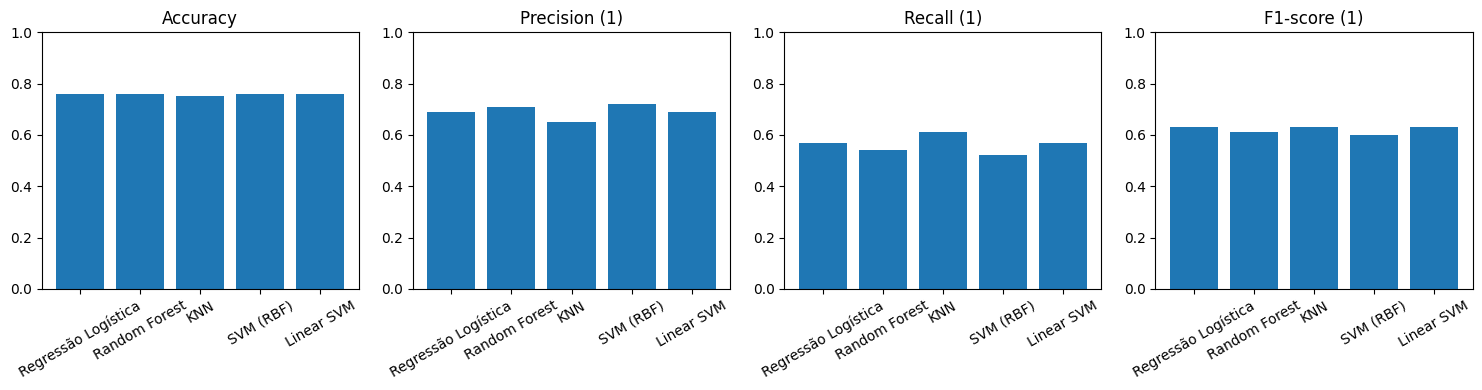

Desempenho para a classe Negativo (Não Diabéticos):


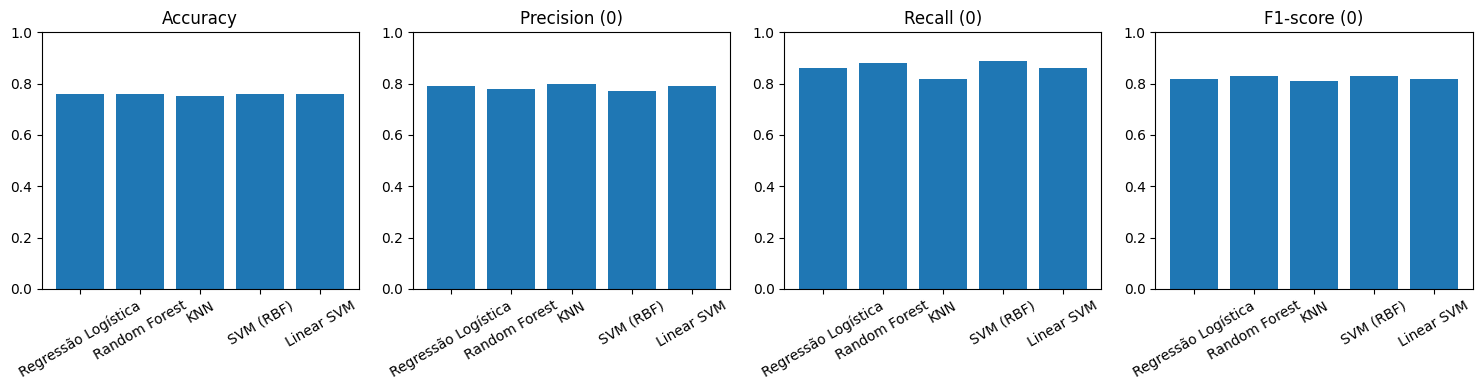

In [ ]:
# plotando os gráficos de barras para as métricas de desempenho dos modelos - Casos positivos
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=False)
metrics = ["Accuracy", "Precision (1)", "Recall (1)", "F1-score (1)"]
for i, metric in enumerate(metrics):
    axes[i].bar(results_positivo_df["Modelo"], results_positivo_df[metric])
    axes[i].set_title(metric)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_ylim(0, 1)

print ("Desempenho para a classe Positivo (Diabéticos):")
plt.tight_layout()
plt.show()


# plotando os gráficos de barras para as métricas de desempenho dos modelos - Casos negativos
fig, axes = plt.subplots(1, 4, figsize=(15, 4), sharey=False)
metrics = ["Accuracy", "Precision (0)", "Recall (0)", "F1-score (0)"]
for i, metric in enumerate(metrics):
    axes[i].bar(results_negativo_df["Modelo"], results_negativo_df[metric])
    axes[i].set_title(metric)
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_ylim(0, 1)

print ("Desempenho para a classe Negativo (Não Diabéticos):")
plt.tight_layout()
plt.show()

Os gráficos apresentados comparam o desempenho dos modelos a partir das métricas Accuracy, Precision, Recall e F1-score (definidas ao final desta seção). Observa-se que, embora os modelos apresentem valores semelhantes de accuracy, surgem diferenças mais expressivas ao analisar o recall da classe positiva. Essa métrica é especialmente relevante em aplicações médicas, pois está diretamente associada à redução de falsos negativos, isto é, à correta identificação de pacientes diabéticos.

Além disso, a análise da precision da classe negativa também contribui para a escolha do modelo mais adequado, uma vez que indica a proporção de pacientes corretamente classificados como não diabéticos, auxiliando na redução de diagnósticos incorretos e de intervenções clínicas desnecessárias.

No contexto deste problema, o erro mais crítico consiste em classificar um paciente diabético como não diabético (falso negativo). Essa preocupação se reflete diretamente na importância atribuída à métrica de recall da classe positiva (Recall (1)).

O modelo KNN apresentou o melhor desempenho em Recall (1), além de bons resultados na precision da classe negativa, indicando uma menor incidência de classificações incorretas de pacientes diabéticos como não diabéticos. No entanto, apesar desses pontos positivos, o KNN não foi selecionado como modelo final devido a algumas limitações relevantes no contexto médico: sua elevada sensibilidade a outliers — que podem surgir, por exemplo, em decorrência de erros de medição —, maior custo computacional e menor interpretabilidade de seus resultados.

Desconsiderando o KNN, os modelos de Regressão Logística e Linear SVM destacaram-se pelo desempenho mais equilibrado em Recall (1). Considerando que o Linear SVM apresenta menor interpretabilidade, aspecto fundamental em aplicações relacionadas a diagnósticos médicos, optou-se pela Regressão Logística como modelo final para o problema em estudo.



📌 Definições das métricas avaliadas
- Accuracy mede o desempenho geral do modelo, porém pode mascarar erros na classe minoritária, especialmente em conjuntos de dados desbalanceados.
- Precision indica a confiabilidade das previsões realizadas pelo modelo, correspondendo à proporção de classificações corretas entre os exemplos previstos como pertencentes a uma determinada classe.
- Recall representa a capacidade do modelo em identificar corretamente os casos positivos e negativos, sendo particularmente relevante neste estudo por estar diretamente relacionado à detecção de pacientes diabéticos.
- F1-score corresponde à média harmônica entre precision e recall, fornecendo uma métrica equilibrada para a avaliação do desempenho do classificador.

### Interpretação dos Resultados

Para interpretar os dados apresentados nos testes vamos utilizar duas técnicas:

- Feature Importance: técnica que mede o quanto cada variável contribui para as decisões do modelo, considerando o conjunto de dados como um todo.
    * Quais variáveis o modelo considera mais importantes para tomar decisões?

- SHAP (SHapley Additive exPlanations): técnica que explica quanto cada feature contribuiu para uma predição específica, além de mostrar em qual direção. 
    * Por que o modelo tomou essa decisão para este paciente?


Embora a Regressão Logística tenha sido selecionada como modelo final para a predição, a interpretação dos resultados foi conduzida utilizando um modelo baseado em árvores (Random Forest), devido à sua capacidade de capturar relações não lineares e fornecer medidas de importância das variáveis. Essa abordagem permitiu uma análise mais abrangente dos fatores associados ao diagnóstico, sem comprometer a escolha do classificador final.


FEATURE IMPORTANCE

In [104]:
import pandas as pd

# obtendo as importâncias das features do modelo Random Forest
importances = rf_pipeline.named_steps['model'].feature_importances_

# criando um DataFrame para visualizar as importâncias das features
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances.round(2)
}).sort_values(by='Importance', ascending=False)

# exibindo as importâncias das features
feature_importance_df

,Feature,Importance
1,Glucose,0.25
5,BMI,0.16
6,DiabetesPedigreeFunction,0.13
7,Age,0.13
4,Insulin,0.09
2,BloodPressure,0.08
0,Pregnancies,0.07
3,SkinThickness,0.07


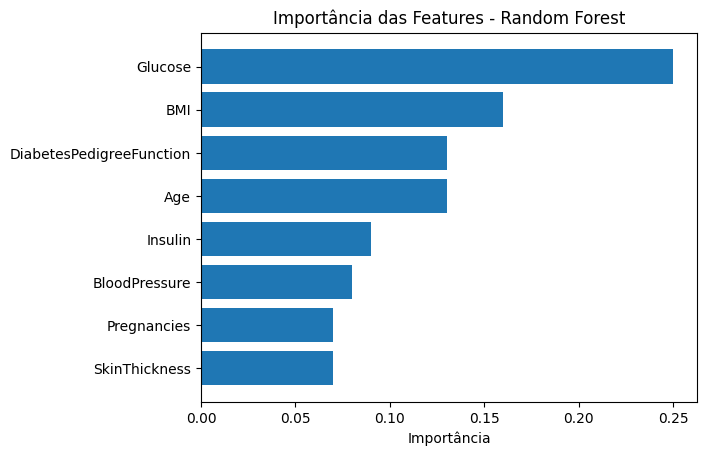

In [105]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(
    feature_importance_df['Feature'],
    feature_importance_df['Importance']
)
plt.title("Importância das Features - Random Forest")
plt.xlabel("Importância")
plt.gca().invert_yaxis()
plt.show()

A análise de importância das variáveis, realizada a partir do modelo Random Forest, indica que atributos como nível de glicose, índice de massa corporal (BMI) e idade exercem maior influência nas decisões do modelo. Esses resultados estão alinhados com o conhecimento médico existente, reforçando a confiabilidade do classificador. 


* É importante ressaltar que a Feature Importance não indica causalidade, ou seja, não estabelece uma relação de causa e efeito com o diagnóstico, mas apenas reflete a contribuição relativa de cada variável para as decisões do modelo.

SHAP

In [ ]:
import shap 

explainer = shap.TreeExplainer(
    rf_pipeline.named_steps['model']
)

# preparando os dados de treino para o cálculo dos valores SHAP
X_transformed = rf_pipeline[:-1].transform(X_train)
shap_values = explainer.shap_values(X_transformed)

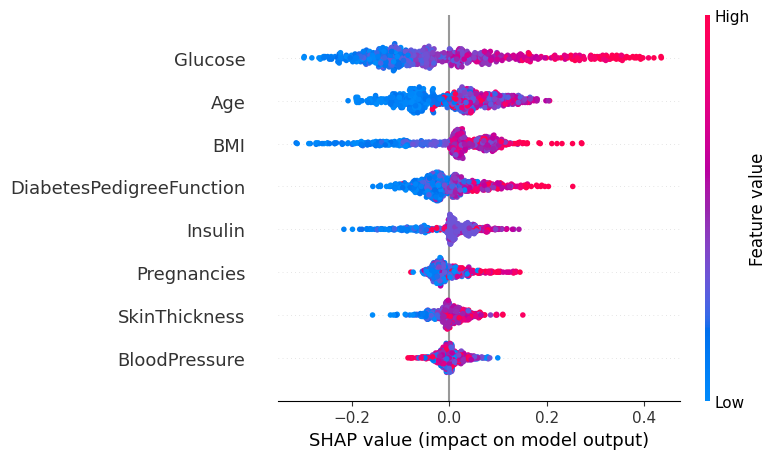

In [111]:
# Visualizando o SHAP para a classe 1 (Diabéticos)
shap.summary_plot(
    shap_values[:, :, 1],  # classe 1 = diabéticos (todas as linhas, todas as features, classe 1)
    X_transformed,
    feature_names=X_train.columns
)

Com a aplicação da técnica SHAP foi possível visualizar que valores altos de Glicose e IMC (BMI) aumentam a probabilidade de classificação positiva para diabetes, enquanto valores mais baixos dessas variáveis reduzem o risco, evidenciando a coerência do modelo com o domínio clínico.

A interpretação dos resultados acima demonstra que o modelo não apenas apresenta bom desempenho preditivo, mas também aprende padrões consistentes com o conhecimento médico, fator essencial para aplicações na área da saúde.

### DISCUSSÃO CRÍTICA DOS RESULTADOS

Os resultados obtidos demonstram que, embora os modelos avaliados apresentem valores semelhantes de accuracy, essa métrica isoladamente não é suficiente para avaliar adequadamente o desempenho em um contexto médico. Em problemas de diagnóstico, como a detecção de diabetes, o custo associado aos falsos negativos é significativamente mais elevado, tornando o recall da classe positiva uma métrica prioritária na análise.

Nesse sentido, o modelo KNN apresentou o melhor desempenho em termos de recall para a classe positiva, indicando maior capacidade de identificar pacientes diabéticos. No entanto, sua sensibilidade a outliers, maior custo computacional e menor interpretabilidade limitaram sua adequação para o contexto proposto. Esses fatores são especialmente relevantes em aplicações médicas, nas quais a confiabilidade, a robustez e a transparência das decisões do modelo são fundamentais.

A Regressão Logística, selecionada como modelo final, apresentou desempenho competitivo, aliando resultados consistentes nas métricas avaliadas a uma maior interpretabilidade e estabilidade. Essa característica facilita a compreensão do processo decisório e permite maior alinhamento com práticas clínicas, aspecto essencial para a adoção de modelos de aprendizado de máquina na área da saúde.

A interpretação dos resultados foi realizada por meio de técnicas como Feature Importance e SHAP, aplicadas a um modelo auxiliar baseado em árvores (Random Forest). Essa abordagem possibilitou identificar as variáveis mais relevantes e compreender os padrões aprendidos a partir dos dados. No entanto, é importante ressaltar que tais técnicas não estabelecem relações de causalidade, limitando-se a explicar associações identificadas pelo modelo.

Algumas limitações devem ser consideradas neste estudo. O conjunto de dados utilizado possui tamanho reduzido e foi coletado em um contexto específico, o que pode restringir a capacidade de generalização dos modelos. Além disso, a ausência de informações clínicas mais detalhadas e a possível presença de ruídos ou valores atípicos nos dados podem impactar o desempenho dos classificadores.

Como trabalhos futuros, sugere-se a utilização de conjuntos de dados maiores e mais diversos, a inclusão de variáveis clínicas adicionais, bem como a avaliação de técnicas de balanceamento de classes e validação externa. Tais abordagens podem contribuir para o aprimoramento do desempenho e da confiabilidade dos modelos propostos.
